In [2]:
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt
from loguru import logger
import numpy as np

from valleyfloor.process_topography import process_topography
from valleyfloor.delineate_reaches import delineate_reaches
from valleyfloor.utils import setup_wbt

logger.enable("valleyfloor")

In [3]:
wbt = setup_wbt("~/opt/WBT/", "../working_dir")

dem = rxr.open_rasterio("../data/input/dem.tif", masked=True).squeeze()
flowlines = gpd.read_file("../data/input/flowlines.shp")

In [4]:
dataset, aligned_flowlines = process_topography(dem, flowlines, wbt)

2024-10-09 13:48:52.870 | INFO     | valleyfloor.process_topography:process_topography:36 - process topography
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/slopes-hCrF487D-py3.10/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [5]:
from slopes.subbasins import label_subbasins
from slopes.hillslopes import label_hillslopes

In [6]:
subbasins = label_subbasins(dataset['flow_dir'], dataset['flow_acc'], dataset['flowpaths'], wbt)

In [7]:
hillslopes = label_hillslopes(dataset['flowpaths'], dataset['flow_dir'], subbasins, wbt)

In [13]:
# get cross sections now
aligned_flowlines

,Stream_ID,geometry
0,1.0,"LINESTRING (393865.5 3791235.5, 393866.5 37912..."
1,2.0,"LINESTRING (395219.5 3791163.5, 395218.5 37911..."
2,3.0,"LINESTRING (394322.5 3791032.5, 394322.5 37910..."
3,4.0,"LINESTRING (395096.5 3791023.5, 395096.5 37910..."
4,5.0,"LINESTRING (394657.5 3790993.5, 394654.5 37909..."
5,6.0,"LINESTRING (394902.5 3790597.5, 394902.5 37905..."
6,7.0,"LINESTRING (394514.5 3790355.5, 394514.5 37903..."
7,9.0,"LINESTRING (394536.5 3790394.5, 394536.5 37903..."
8,10.0,"LINESTRING (394129.5 3790570.5, 394128.5 37905..."
9,11.0,"LINESTRING (394631.5 3790957.5, 394630.5 37909..."


In [16]:
stream_ID = 1

In [77]:
flowline = aligned_flowlines.loc[aligned_flowlines['Stream_ID'] == stream_ID, 'geometry'].iloc[0]

In [78]:
from slopes.network_xsections import *

In [130]:
xs = network_xsections(aligned_flowlines, dataset[['hand', 'slope', 'curvature', 'flowpaths']], 10, 40, 3, subbasins=subbasins)

In [131]:
xs

,alpha,point,cross_section_id,streamID,hand,slope,curvature,flowpaths
0,273,POINT (393941.905 3790751.622),29,1.0,109.070496,3.315663,0.055764,NaN
1,270,POINT (393942.392 3790754.582),29,1.0,108.047791,24.805983,0.083998,NaN
2,180,POINT (393937.804 3790757.921),65,1.0,108.332825,11.263123,0.157962,NaN
3,177,POINT (393940.72 3790758.624),65,1.0,106.982178,32.793724,0.054765,NaN
4,-306,POINT (393925.524 3790772.726),45,1.0,104.513123,46.369362,0.091014,NaN
...,...,...,...,...,...,...,...,...
51184,-79,POINT (394065.887 3790729.309),0,14.0,70.002075,36.595745,-0.004971,NaN
51185,-82,POINT (394062.902 3790729.606),0,14.0,72.376282,38.395496,-0.002544,NaN
51186,-85,POINT (394059.916 3790729.902),0,14.0,74.702332,39.102230,-0.000172,NaN
51187,-88,POINT (394056.931 3790730.199),0,14.0,77.015381,37.325775,0.002708,NaN


In [132]:
stream_xs= xs.loc[xs['streamID'] == 9]
stream_xs

,alpha,point,cross_section_id,streamID,hand,slope,curvature,flowpaths
18413,-119,POINT (394224.584 3790380.495),32,9.0,112.794800,36.905663,-0.001763,NaN
18414,-116,POINT (394224.966 3790383.47),32,9.0,110.356628,39.364204,0.003489,NaN
18415,202,POINT (394246.962 3790295.843),31,9.0,191.081238,36.130737,0.086357,NaN
18416,199,POINT (394247.003 3790298.843),31,9.0,188.350281,43.396084,0.003723,NaN
18417,196,POINT (394247.044 3790301.843),31,9.0,185.405579,39.749565,-0.018660,NaN
...,...,...,...,...,...,...,...,...
23239,103,POINT (394251.805 3790601.084),34,9.0,83.280502,15.774502,0.011072,NaN
23240,-104,POINT (394251.143 3790601.815),31,9.0,83.280502,15.774502,0.011072,NaN
23241,103,POINT (394252.882 3790600.684),32,9.0,83.349044,18.251348,0.032537,NaN
23242,103,POINT (394256.676 3790601.048),30,9.0,84.671981,13.587378,0.018673,NaN


In [133]:
sample = stream_xs.loc[stream_xs['cross_section_id'] == 10].sort_values('alpha')

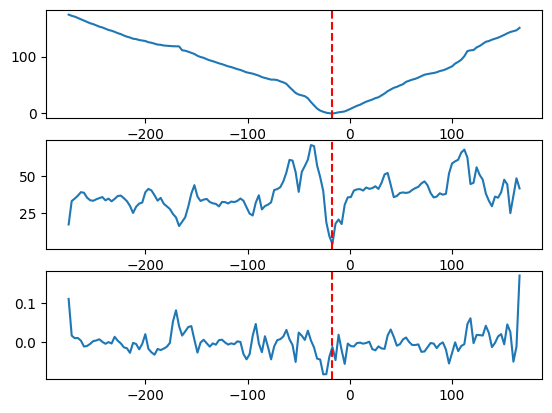

In [142]:
fig, axes = plt.subplots(3)
axes[0].plot(sample['alpha'], sample['hand'])
axes[0].axvline(x=-17, color='r', linestyle='--')
axes[1].plot(sample['alpha'], sample['slope'])
axes[1].axvline(x=-17, color='r', linestyle='--')
axes[2].plot(sample['alpha'], sample['curvature'])
axes[2].axvline(x=-17, color='r', linestyle='--')

In [140]:
sample.loc[sample['flowpaths'] == 9, 'alpha']

20667   -17
Name: alpha, dtype: int64